# Load dataset

In [1]:
from tensorflow.keras.utils import image_dataset_from_directory

2022-09-16 15:50:08.615840: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-16 15:50:09.113449: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-16 15:50:09.113526: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-16 15:50:09.196578: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-16 15:50:10.624945: W tensorflow/stream_executor/platform/de

In [2]:
with open("data_path.txt", "r") as f:
    data_path = f.read()

In [3]:
def load_images(data_path: str, batch_size: int, size: tuple, split: tuple):
    train_ds = image_dataset_from_directory(
        data_path,
        validation_split=split[0],
        subset="training",
        seed=123,
        image_size=size,
        batch_size=batch_size)
    
    val_ds = image_dataset_from_directory(
        data_path,
        validation_split=split[1],
        subset="validation",
        seed=123,
        image_size=size,
        batch_size=batch_size)
    
    return (train_ds, val_ds)

# Modelsation

In [4]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# PLot performances
import matplotlib.pyplot as plt

In [5]:
num_classes = 1

## NN

In [6]:
batch_size = 32
height = 28
width = 28
size = (height, width)
split = (0.9, 0.05)

In [7]:
train_ds ,val_ds = load_images(data_path, batch_size, size, split)

Found 25000 files belonging to 2 classes.
Using 2500 files for training.


2022-09-16 15:50:13.859226: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-16 15:50:13.859447: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-16 15:50:13.859508: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-09-16 15:50:13.859555: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-09-16 15:50:13.859604: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Found 25000 files belonging to 2 classes.
Using 1250 files for validation.


In [8]:
# https://www.tensorflow.org/tutorials/keras/classification
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(height, width, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes)
])

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2352)              0         
                                                                 
 dense (Dense)               (None, 128)               301184    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 301,313
Trainable params: 301,313
Non-trainable params: 0
_________________________________________________________________


### Training

In [9]:
epochs = 10
callback = EarlyStopping(monitor='val_loss', patience=3)

In [10]:
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callback)

Epoch 1/10
79/79 [==============================] - 25s 292ms/step - loss: 42.8901 - binary_accuracy: 0.5128 - val_loss: 5.6142 - val_binary_accuracy: 0.5360
Epoch 2/10
79/79 [==============================] - 1s 7ms/step - loss: 4.0925 - binary_accuracy: 0.5408 - val_loss: 2.8364 - val_binary_accuracy: 0.5432
Epoch 3/10
79/79 [==============================] - 1s 7ms/step - loss: 2.2801 - binary_accuracy: 0.5548 - val_loss: 3.4441 - val_binary_accuracy: 0.5200
Epoch 4/10
79/79 [==============================] - 1s 6ms/step - loss: 1.9697 - binary_accuracy: 0.5648 - val_loss: 1.8084 - val_binary_accuracy: 0.5608
Epoch 5/10
79/79 [==============================] - 1s 7ms/step - loss: 1.8982 - binary_accuracy: 0.5628 - val_loss: 2.9114 - val_binary_accuracy: 0.5192
Epoch 6/10
79/79 [==============================] - 1s 6ms/step - loss: 1.7242 - binary_accuracy: 0.5788 - val_loss: 2.7528 - val_binary_accuracy: 0.5192
Epoch 7/10
79/79 [==============================] - 1s 7ms/step - loss: 

### Performances

In [11]:
def plot_history(history) -> None:
    acc = history.history['binary_accuracy']
    val_acc = history.history['val_binary_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

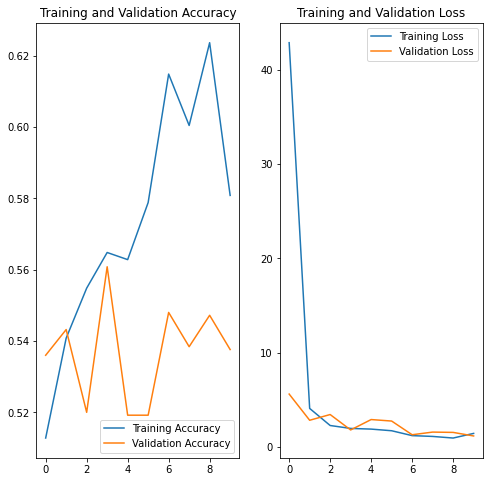

In [12]:
plot_history(history)

## CNN

In [13]:
height = 224
width = 224
size = (height, width)

In [14]:
train_ds ,val_ds = load_images(data_path, batch_size, size, split)

Found 25000 files belonging to 2 classes.
Using 2500 files for training.
Found 25000 files belonging to 2 classes.
Using 1250 files for validation.


In [15]:
# https://www.tensorflow.org/tutorials/images/classification

model = keras.Sequential([
  keras.layers.Rescaling(1./255, input_shape=(height, width, 3)),
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes)])

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)       

### Training and performances

In [16]:
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callback)

Epoch 1/10
79/79 [==============================] - 57s 724ms/step - loss: 0.7550 - binary_accuracy: 0.4916 - val_loss: 0.6909 - val_binary_accuracy: 0.4984
Epoch 2/10
79/79 [==============================] - 57s 715ms/step - loss: 0.6828 - binary_accuracy: 0.5216 - val_loss: 0.6679 - val_binary_accuracy: 0.6192
Epoch 3/10
79/79 [==============================] - 56s 713ms/step - loss: 0.6433 - binary_accuracy: 0.5896 - val_loss: 0.6262 - val_binary_accuracy: 0.6664
Epoch 4/10
79/79 [==============================] - 57s 715ms/step - loss: 0.5764 - binary_accuracy: 0.6744 - val_loss: 0.5766 - val_binary_accuracy: 0.6976
Epoch 5/10
79/79 [==============================] - 57s 719ms/step - loss: 0.4707 - binary_accuracy: 0.7440 - val_loss: 0.7797 - val_binary_accuracy: 0.6592
Epoch 6/10
79/79 [==============================] - 57s 718ms/step - loss: 0.3743 - binary_accuracy: 0.8160 - val_loss: 0.7044 - val_binary_accuracy: 0.6656
Epoch 7/10
79/79 [==============================] - 57s 71

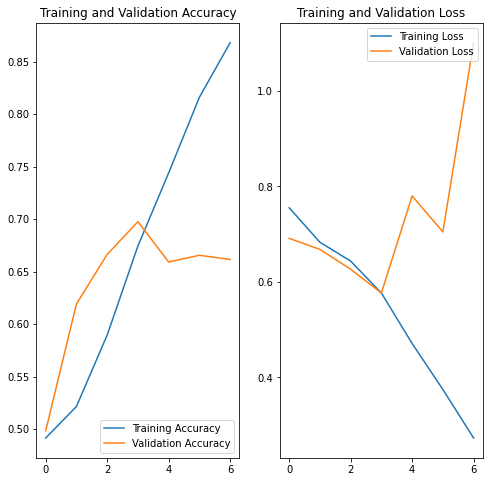

In [17]:
plot_history(history)

## ResNet50

In [20]:
base_model = ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)
base_model.trainable = False

inputs = keras.Input(shape=(height, width, 3))
x = preprocess_input(inputs)
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(num_classes)(x)
model = keras.Model(inputs, outputs)

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_____________________________________________

### Training and performances

In [ ]:
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callback)

Epoch 1/10
79/79 [==============================] - 256s 3s/step - loss: 0.1968 - binary_accuracy: 0.9204 - val_loss: 0.0953 - val_binary_accuracy: 0.9584
Epoch 2/10
79/79 [==============================] - ETA: 0s - loss: 0.0832 - binary_accuracy: 0.9680

KeyboardInterrupt: 

In [ ]:
plot_history(history)

# References

* https://github.com/PacktPublishing/Learning-Computer-Vision-with-TensorFlow
* https://www.tensorflow.org/tutorials/keras/classification
* https://www.tensorflow.org/tutorials/images/classification
* https://keras.io/guides/transfer_learning/